In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import sys
# np.set_printoptions(threshold=sys.maxsize)

**1. Displaying Input Image**

Image Dimensions:  (168, 300, 3)


(-0.5, 299.5, 167.5, -0.5)

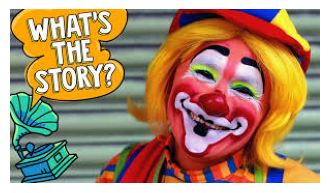

In [ ]:
img = plt.imread('/content/drive/MyDrive/Colab Notebooks/EE5178_PA2/clown.jpeg')
print("Image Dimensions: ", img.shape)
plt.figure(figsize=(4,4))
plt.imshow(img)
plt.axis('off')

**2.Conver it to Grayscale**

Gray scale Image Dimensions:  (168, 300)


(-0.5, 299.5, 167.5, -0.5)

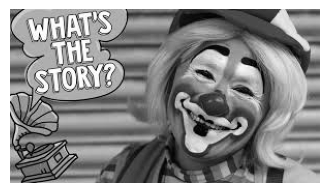

In [ ]:
def RGB2GRAY(input_img):
  r = input_img[:,:,0]
  g = input_img[:,:,1]
  b = input_img[:,:,2]

  gray_scale_img = 0.2989 * r + 0.5870 * g + 0.1140 * b

  return gray_scale_img

#Convert Color Image to Gray scale Image
gray_scale_img = RGB2GRAY(img)

print("Gray scale Image Dimensions: ", gray_scale_img.shape)
plt.figure(figsize=(4,4))
plt.imshow(gray_scale_img, cmap = 'gray')
plt.axis('off')

**3. Supressing Noise using Gaussian Filter**

Filtered Image Dimensions:  (168, 300)


(-0.5, 299.5, 167.5, -0.5)

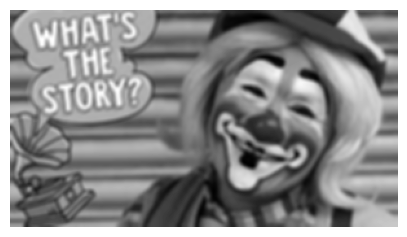

In [ ]:
# Apply Gaussian filter to remove noise
gaussian_filtered_image = cv2.GaussianBlur(gray_scale_img, (5, 5), 1.5)

print("Filtered Image Dimensions: ", gaussian_filtered_image.shape)
plt.figure(figsize=(5,5))
plt.imshow(gaussian_filtered_image, cmap = 'gray')
plt.axis('off')

**4. Edge detection using Sobel**

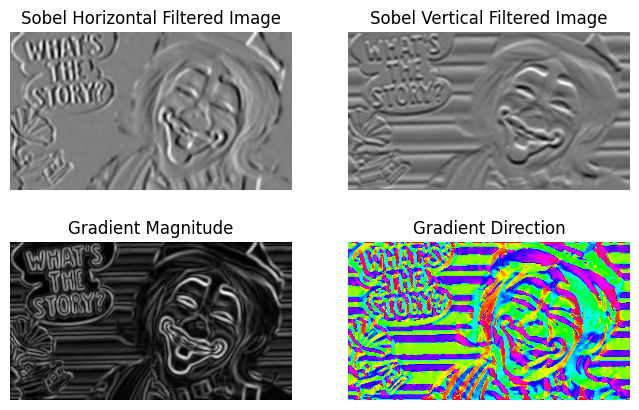

In [ ]:
def DoSobel(image):
  sobelX = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3) # Vertical Edges

  sobelY = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3) # Horizontal Edges

  # Magnitude and direction of the gradient
  magnitude = np.sqrt(np.multiply(sobelX, sobelX) + np.multiply(sobelY, sobelY)) # Gradient Magnitude
  direction = np.arctan2(sobelY, sobelX) # Gradient Phase

  # Display the images
  plt.figure(figsize=(8, 5))

  plt.subplot(2, 2, 1)
  plt.imshow(sobelX, cmap='gray')
  plt.title('Sobel Horizontal Filtered Image')
  plt.axis('off')

  plt.subplot(2, 2, 2)
  plt.imshow(sobelY, cmap='gray')
  plt.title('Sobel Vertical Filtered Image')
  plt.axis('off')

  plt.subplot(2, 2, 3)
  plt.imshow(magnitude, cmap='gray')
  plt.title('Gradient Magnitude')
  plt.axis('off')

  plt.subplot(2, 2, 4)
  plt.imshow(direction, cmap='hsv')
  plt.title('Gradient Direction')
  plt.axis('off')

  plt.show()

  return magnitude, direction

magnitude, direction_rad = DoSobel(gaussian_filtered_image)

**5. Non Maxima Suppression**

In [ ]:
def NMS_IMAGE_GEN(magnitude, direction_rad ):
  direction_deg = direction_rad*(180/np.pi)

  nms_image = np.zeros((magnitude.shape[0],magnitude.shape[1]))

  # Iterators
  itr_mag = np.nditer(magnitude, flags=['multi_index'])
  itr_phase = np.nditer(direction_deg, flags=['multi_index'])
  itr_nms = np.nditer(nms_image, flags=['multi_index'])

  '''
  magnitude :  Gradient image
  direction_deg :  phase image in degrees
  mag : magnitude value
  ph : phase value
  nms: NMS image
  '''

  # Iterate through the image and perform the Non maxima suppression based on the Magnitude and Phase
  for count,( mag, ph, nms) in enumerate(zip(itr_mag, itr_phase, itr_nms)):
    mag_i, mag_j = itr_mag.multi_index[0], itr_mag.multi_index[1]
    ph_i, ph_j = itr_phase.multi_index[0], itr_phase.multi_index[1]
    nms_i, nms_j = itr_nms.multi_index[0], itr_nms.multi_index[1]

    if ((0 < mag_i < magnitude.shape[0]-1) and ( 0 < mag_j < magnitude.shape[1]-1)): # stay wihtin the bounds of image
      if (ph >= 0 and ph < 45):
        if ((magnitude[mag_i, mag_j+1] < mag) and (magnitude[mag_i, mag_j-1] < mag)):
          #retain
          nms_image[nms_i, nms_j] = magnitude[mag_i, mag_j]

      elif (ph >= 45 and ph < 90):
        if ((magnitude[mag_i+1, mag_j+1] < mag) and (magnitude[mag_i-1, mag_j-1] < mag)):
          #retain
          nms_image[nms_i, nms_j] = magnitude[mag_i, mag_j]

      elif (ph >= 90 and ph < 135):
        if ((magnitude[mag_i+1, mag_j] < mag) and (magnitude[mag_i-1, mag_j] < mag)):
          #retain
          nms_image[nms_i, nms_j] = magnitude[mag_i, mag_j]

      elif (ph >= 135 and ph < 180):
        if ((magnitude[mag_i+1, mag_j-1] < mag) and (magnitude[mag_i-1, mag_j+1] < mag)):
          #retain
          nms_image[nms_i, nms_j] = magnitude[mag_i, mag_j]

      elif (ph <=0 and ph > -45):
        if ((magnitude[mag_i, mag_j+1] < mag) and (magnitude[mag_i, mag_j-1] < mag)):
          #retain
          nms_image[nms_i, nms_j] = magnitude[mag_i, mag_j]

      elif (ph <=-45 and ph > -90):
        if ((magnitude[mag_i+1, mag_j-1] < mag) and (magnitude[mag_i-1, mag_j+1] < mag)):
          #retain
          nms_image[nms_i, nms_j] = magnitude[mag_i, mag_j]

      elif (ph <=-90 and ph > -135):
        if ((magnitude[mag_i-1, mag_j] < mag) and (magnitude[mag_i+1, mag_j] < mag)):
          #retain
          nms_image[nms_i, nms_j] = magnitude[mag_i, mag_j]

      elif (ph <=-135 and ph > -180):
        if ((magnitude[mag_i+1, mag_j+1] < mag) and (magnitude[mag_i-1, mag_j-1] < mag)):
          #retain
          nms_image[nms_i, nms_j] = magnitude[mag_i, mag_j]

  return nms_image

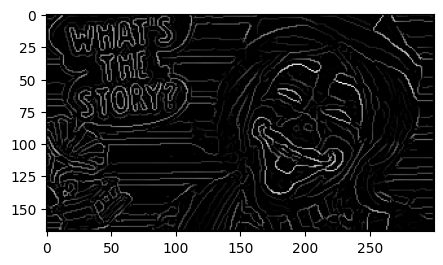

In [ ]:
nms_image = NMS_IMAGE_GEN(magnitude, direction_rad)
plt.figure(figsize=(5, 5))
plt.imshow(nms_image, cmap = 'gray')

**6.Median Value Thresholding and Final Canny Edge Image**

In [ ]:
# Perform Thresholding based on the Median Value present in the Magnitude Response

def THRESHOLD(magnitude):
  median_threshold = np.median(magnitude)
  canny_img = np.zeros(magnitude.shape)
  # print(magnitude.shape)
  for i in range(magnitude.shape[0]):
    for j in range(magnitude.shape[1]):
      if (nms_image[i][j] > median_threshold):
        canny_img[i][j] = 1

  return canny_img

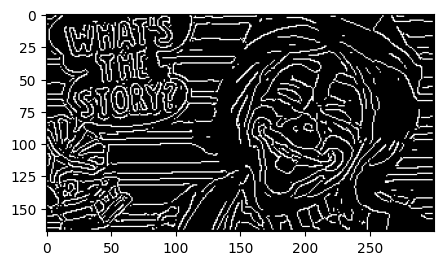

In [ ]:
canny_img = THRESHOLD(magnitude)
plt.figure(figsize=(5, 5))
plt.imshow(canny_img, cmap = 'gray')

**Filtering**

Filtered Image Dimensions:  (168, 300)


(-0.5, 299.5, 167.5, -0.5)

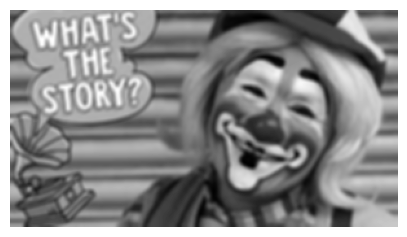

In [ ]:
# Apply Gaussian filter to remove noise
gaussian_filtered_image_2 = cv2.GaussianBlur(gray_scale_img, (3, 3), 3)

print("Filtered Image Dimensions: ", gaussian_filtered_image.shape)
plt.figure(figsize=(5,5))
plt.imshow(gaussian_filtered_image, cmap = 'gray')
plt.axis('off')

**Edge Response**

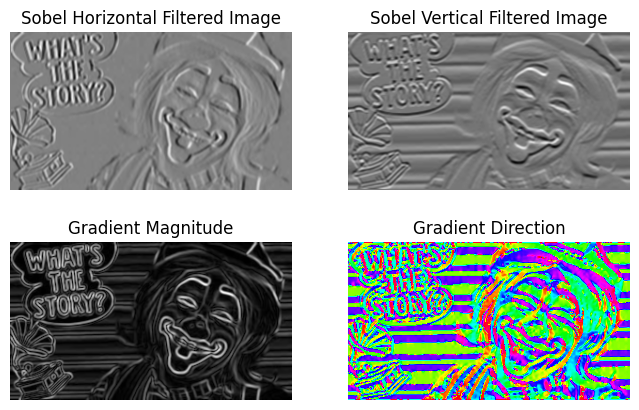

In [ ]:
magnitude_1, direction_rad_1 = DoSobel(gaussian_filtered_image_2)

**NMS Image**

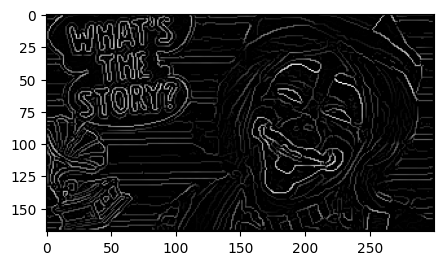

In [ ]:
nms_image_1 = NMS_IMAGE_GEN(magnitude_1, direction_rad_1)
plt.figure(figsize=(5, 5))
plt.imshow(nms_image_1, cmap = 'gray')

**Final Canny Image**

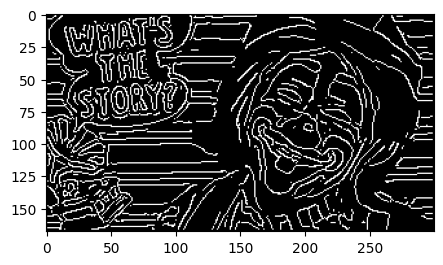

In [ ]:
canny_img = THRESHOLD(magnitude_1)
plt.figure(figsize=(5, 5))
plt.imshow(canny_img, cmap = 'gray')

**Observation**:

a. Performing Gaussian Blur with increased standard deviation increases the Smooting effect on the image, thus reducing the high frequeny components.

b. Only the Edges that are strong/High intensity will present in the final image after increasing the Standard Deviation.

c. The same effect can be seen the Joker right side hair, which donot have strong edges and hence disappeared in the High Standard Deviaion Thresholded Image